In this homework, let's repeat HW 6/7 (MNIST classification using Random Forest and Gradient Boosting).

So far we have manually found the best hyperparameters by doing something like

for hparam1 in set1:
   for hparam 2 in set2:
      ...
      compute validation score for [hparam1, hparam2, ...]

and choosing the best [hparam1,hparam2, ...] with the highest score.
However, scikit-learn already has the sklearn.model_selection.GridSearchCV class.
(See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Links to an external site. for examples and usages.)

Your job is to simply repeat HW 6/7 but with GridSearchCV without using the for loops. If done correctly, your results should be identical to your previous results.

## 0. Importing Libraries

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import GridSearchCV

##1. Loading Data

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
# Load in all mnist data
Xraw, yraw = mnist['data'], mnist['target']
# pd.Dataframe, pd.Series

# Slice out only 0 and 1 data
indices = [i for i in range(len(Xraw)) if (yraw[i] == '0' or yraw[i] == '1')]
y = yraw[indices]
X = Xraw.loc[indices]

# Split and resplit dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

##2. Hyperparameter Search

In [16]:
# Create generic classifier
rfc = RandomForestClassifier(random_state = 0)

# List of parameters to search
params = [{'max_depth':[1,2,5,10,20],
           'n_estimators':[10,20,50,100,200]
           }]

# Do cvgridsearch
rfc_cv = GridSearchCV(rfc, param_grid = params, scoring = 'accuracy')
rfc_cv.fit(X_train_train, y_train_train)
# Get best parameters
print(rfc_cv.best_params_)
# Get validation accuracy
print("Validation Accuracy:",rfc_cv.score(X_train_val, y_train_val))

{'max_depth': 10, 'n_estimators': 20}
Validation Accuracy: 0.9989851150202977


##3. Final Validation

In [22]:
# Create tuned classifier
rfc_opt = RandomForestClassifier(max_depth = 10, random_state = 0, n_estimators = 20)

# Fit to all training data
rfc_opt.fit(X_train, y_train)

# Get test and training accuracy
train_accuracy= rfc_opt.score(X_train, y_train)
test_accuracy = rfc_opt.score(X_test, y_test)

print("Train Accuracy: %f, Test Accuracy: %f"%(train_accuracy, test_accuracy))

Train Accuracy: 1.000000, Test Accuracy: 0.998985


##4. Feature Importance

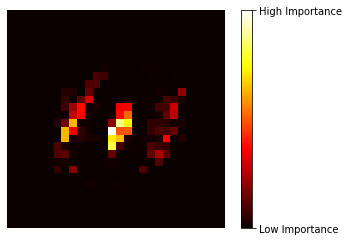

In [7]:
def plot_digit(data):
  # Reshape image to grid
  image = data.reshape(28,28)
  # Show image
  plt.imshow(image, cmap = mpl.cm.hot, interpolation = "nearest")
  plt.axis("off")

# Plot grid of feature_importances
plot_digit(rfc_opt.feature_importances_)

# Set colorbar
cbar = plt.colorbar(ticks = [rfc_opt.feature_importances_.min(), rfc_opt.feature_importances_.max()])
cbar.ax.set_yticklabels(["Low Importance", "High Importance"])

plt.show()

##5. Boosted Hyperparameter Search

In [24]:
# Create generic classifier
gbc = GradientBoostingClassifier(random_state = 0)

# Parameters to search
params = [{'max_depth':[1,2,5,10,20],
           'n_estimators':[10,20,50,100,200]
           }]

# Do cvgridsearch
gbc_cv = GridSearchCV(rfc, param_grid = params, scoring = 'accuracy')
gbc_cv.fit(X_train_train, y_train_train)

# Get best parameters
print(gbc_cv.best_params_)

# Get validation accuracy
print("Validation Accuracy:",gbc_cv.score(X_train_val, y_train_val))

{'max_depth': 10, 'n_estimators': 20}
Validation Accuracy: 0.9989851150202977


##6. Boosted Final Validation

In [21]:
gbc_opt = GradientBoostingClassifier(max_depth = 10, random_state = 0, n_estimators = 20)

gbc_opt.fit(X_train, y_train)
train_accuracy = gbc_opt.score(X_train, y_train)
test_accuracy = gbc_opt.score(X_test, y_test)

print("Train Accuracy: %f, Test ACcuracy: %f"%(train_accuracy, test_accuracy))

Train Accuracy: 1.000000, Test ACcuracy: 0.997632


##7. Boosted Feature Importance

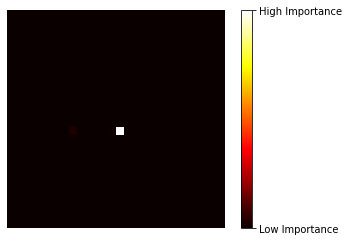

In [23]:
def plot_digit(data):
  # Reshape image to grid
  image = data.reshape(28,28)
  # Show image
  plt.imshow(image, cmap = mpl.cm.hot, interpolation = "nearest")
  plt.axis("off")

# Plot grid of feature_importances
plot_digit(gbc_opt.feature_importances_)

# Set colorbar
cbar = plt.colorbar(ticks = [gbc_opt.feature_importances_.min(), gbc_opt.feature_importances_.max()])
cbar.ax.set_yticklabels(["Low Importance", "High Importance"])

plt.show()